In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import squarify
import yfinance as yf
import plotly
import plotly.express as px
from urllib.parse import quote

import seaborn as sns

# Configurando los estilos de los gráficos
plt.ioff()
sns.set_context('talk')
sns.set_style("whitegrid")

# Configurando plotly orca
plotly.io.orca.config.executable = r'C:\anaconda3\orca_app\orca.exe'
plotly.io.orca.config.save()

In [39]:
plotly.__version__

'4.14.3'

## Data acquisition

In [40]:
excel_df = pd.read_excel('market_stock_value_scoring.xlsx', usecols=['Stock','Symbol','Symbol_Yahoo','Description','MarketCap','Currency','Country','Indices','Sectors'])
excel_df.columns = ['Stock','Symbol','Yahoo Symbol','Description','Country','Indices','Industries','Market Cap','Currency']
excel_df

,Stock,Symbol,Yahoo Symbol,Description,Country,Indices,Industries,Market Cap,Currency
0,Costco Wholesale Corporation,COST,COST,"Costco Wholesale Corporation, together with it...",United States,"NASDAQ 100, S&P 100, S&P 500","Diversified Retail, Retailers, Discount Stores...",182487744512,USD
1,Wm Morrison Supermarkets PLC,MRW,MRW.L,Wm Morrison Supermarkets PLC operates retail s...,United Kingdom,FTSE 100,"Consumer Non-Cyclicals, Food & Drug Retailing,...",6383454208,GBp
2,adidas AG,ADS,ADS.F,"adidas AG, together with its subsidiaries, des...",Germany,"DAX, EURO STOXX 50","Cyclical Consumer Products, Footwear, Textiles...",61758750720,EUR
3,JD Sports Fashion plc,JD,JD.L,JD Sports Fashion plc engages in the retail of...,United Kingdom,FTSE 100,Retail,9872699392,GBp
4,United Parcel Service Inc.,UPS,UPS,"United Parcel Service, Inc. provides letter an...",United States,"S&P 100, S&P 500","Industrial Goods, Industrials, Aerospace & Def...",187483979776,USD
5,Johnson Matthey PLC,JMAT,JMAT.L,Johnson Matthey Plc provides specialty chemica...,United Kingdom,FTSE 100,"Specialty Chemicals, Basic Materials, Chemicals",6119513088,GBp
6,Ford Motor Company,F,F,"Ford Motor Company designs, manufactures, mark...",United States,"S&P 100, S&P 500","Auto & Truck Manufacturers, Automobiles & Auto...",57798946816,USD
7,Amazon.com Inc.,AMZN,AMZN,"Amazon.com, Inc. engages in the retail sale of...",United States,"NASDAQ 100, S&P 100, S&P 500","Diversified Retail, Retailers, Department Stor...",1875752517632,USD
8,Ferguson PLC,FERG,FERG.L,Ferguson plc distributes plumbing and heating ...,United Kingdom,FTSE 100,Building materials,23175823360,GBp
9,Vodafone Group PLC,VOD,VOD,Vodafone Group Plc engages in telecommunicatio...,United Kingdom,FTSE 100,"Telecommunications Services, Wireless Telecomm...",46460289024,USD


## Data transformation

In [41]:
# Getting market cap in USD

def get_to_usd_rate(currency):
    if (currency == 'USD'):
        return 1
    elif (currency == 'EUR'):
        return EUR_TO_USD
    elif (currency == 'GBp'):
        return GBP_TO_USD
    else:
        raise Exception("Unsupported currency!")

def get_current_price(symbol):
    ticker = yf.Ticker(symbol)
    todays_data = ticker.history(period='1d')
    return todays_data['Close'][0]

EUR_TO_USD = 1 / get_current_price('USDEUR=X')
GBP_TO_USD = 1 / get_current_price('USDGBP=X')

excel_df['Market Cap (USD)'] = excel_df['Market Cap'] * excel_df['Currency'].apply(get_to_usd_rate)

In [42]:
source_df = excel_df[['Symbol','Yahoo Symbol','Country','Indices','Industries','Market Cap (USD)']]
source_df

,Symbol,Yahoo Symbol,Country,Indices,Industries,Market Cap (USD)
0,COST,COST,United States,"NASDAQ 100, S&P 100, S&P 500","Diversified Retail, Retailers, Discount Stores...",1.824877e+11
1,MRW,MRW.L,United Kingdom,FTSE 100,"Consumer Non-Cyclicals, Food & Drug Retailing,...",8.828144e+09
2,ADS,ADS.F,Germany,"DAX, EURO STOXX 50","Cyclical Consumer Products, Footwear, Textiles...",7.294829e+10
3,JD,JD.L,United Kingdom,FTSE 100,Retail,1.365368e+10
4,UPS,UPS,United States,"S&P 100, S&P 500","Industrial Goods, Industrials, Aerospace & Def...",1.874840e+11
5,JMAT,JMAT.L,United Kingdom,FTSE 100,"Specialty Chemicals, Basic Materials, Chemicals",8.463121e+09
6,F,F,United States,"S&P 100, S&P 500","Auto & Truck Manufacturers, Automobiles & Auto...",5.779895e+10
7,AMZN,AMZN,United States,"NASDAQ 100, S&P 100, S&P 500","Diversified Retail, Retailers, Department Stor...",1.875753e+12
8,FERG,FERG.L,United Kingdom,FTSE 100,Building materials,3.205154e+10
9,VOD,VOD,United Kingdom,FTSE 100,"Telecommunications Services, Wireless Telecomm...",4.646029e+10


## Data visualization

In [43]:
def get_color_palette(cmap, src):  
    norm = matplotlib.colors.Normalize(vmin=min(src), vmax=max(src))
    return [cmap(norm(value)) for value in src]    

### By Country

In [44]:
gb_country = source_df.groupby(by='Country')

In [45]:
# Defining sizes, labels and colors
countries = [key for (key,group) in gb_country]
stock_count = [len(group) for (key,group) in gb_country]
colors = get_color_palette(matplotlib.cm.RdYlGn,stock_count)

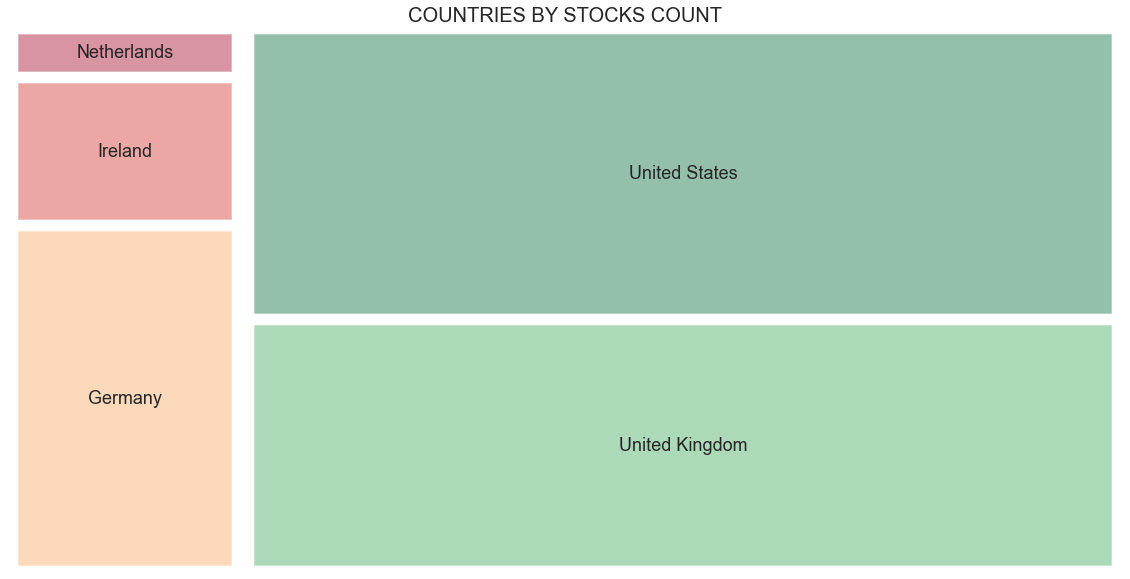

In [46]:
plt.subplots(figsize=(20,10))
squarify.plot(sizes=stock_count, label=countries, color=colors, pad=True, alpha=0.42)
plt.title(f'COUNTRIES BY STOCKS COUNT', size=20)
plt.axis('off')
plt.savefig(f"../images/COUNTRIES.png", bbox_inches='tight')
plt.show()

## By indice

In [47]:
indices = np.unique(', '.join(source_df['Indices']).split(', '))
indices

array(['AEX', 'DAX', 'DOW JONES', 'EURO STOXX 50', 'FTSE 100',
       'NASDAQ 100', 'S&P 100', 'S&P 500'], dtype='<U13')

In [48]:
def plot_by_indice(indice):
    indice_df = excel_df[source_df['Indices'].str.contains(indice)].copy()
    indice_df.sort_values(by='Market Cap (USD)', inplace=True, ascending=False)
    colors = get_color_palette(matplotlib.cm.YlGn,indice_df['Market Cap (USD)'])

    plt.clf()
    plt.subplots(figsize=(20,10), )
    squarify.plot(sizes=indice_df['Market Cap (USD)'], label=indice_df['Yahoo Symbol'], color=colors, pad=True, alpha=0.8, text_kwargs={'color':'#000', 'size':16})
    plt.title(f'{indice} INDEX STOCKS', size=20)
    plt.axis('off')
    plt.savefig(f"../images/{indice}.png", bbox_inches='tight')
    plt.show()
    plt.close()

<Figure size 432x288 with 0 Axes>

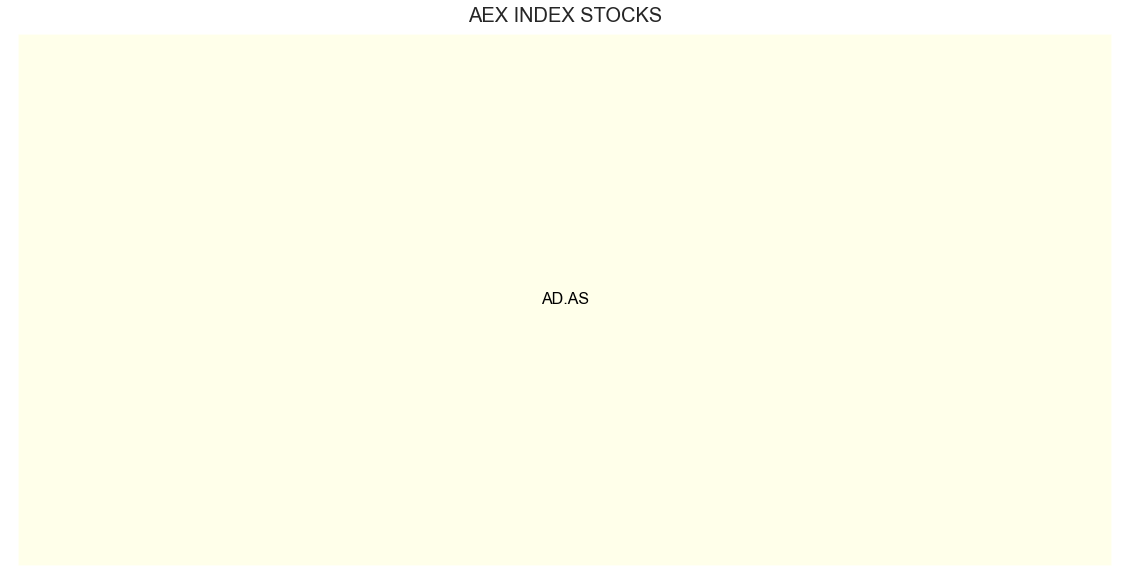

<Figure size 432x288 with 0 Axes>

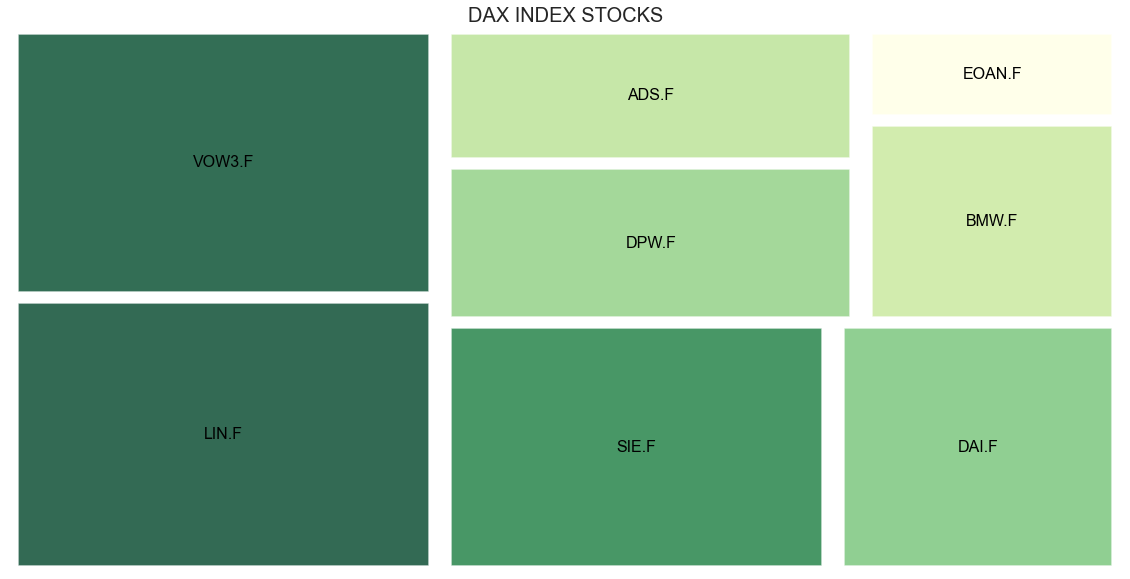

<Figure size 432x288 with 0 Axes>

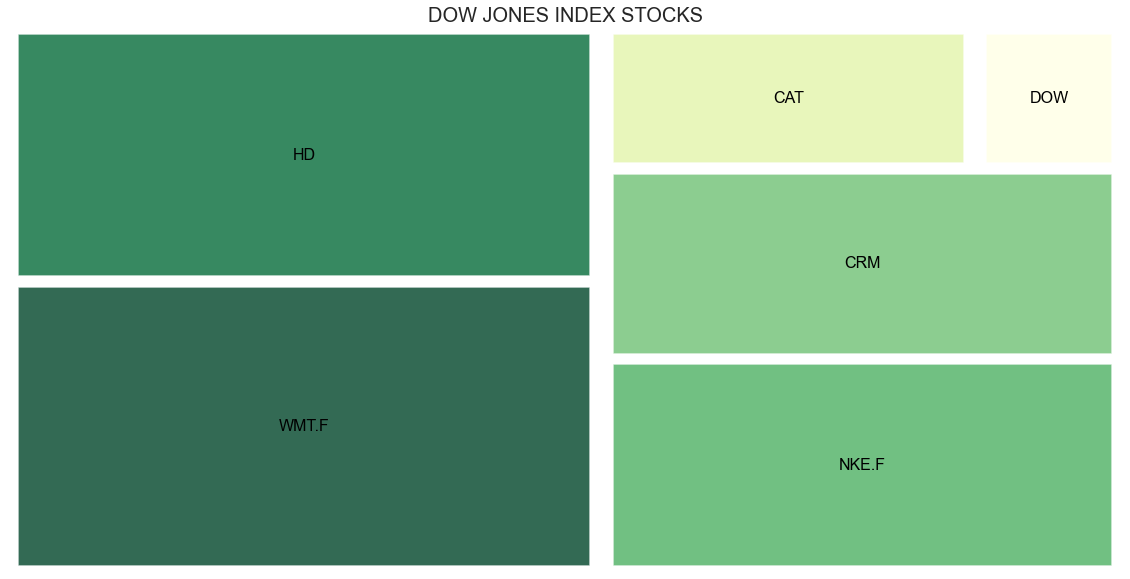

<Figure size 432x288 with 0 Axes>

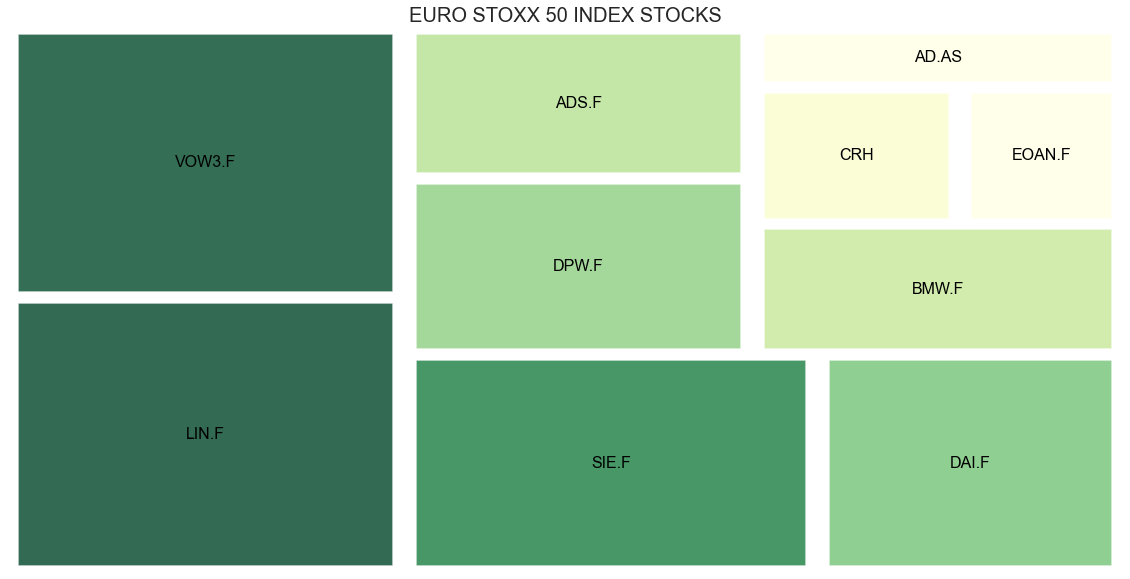

<Figure size 432x288 with 0 Axes>

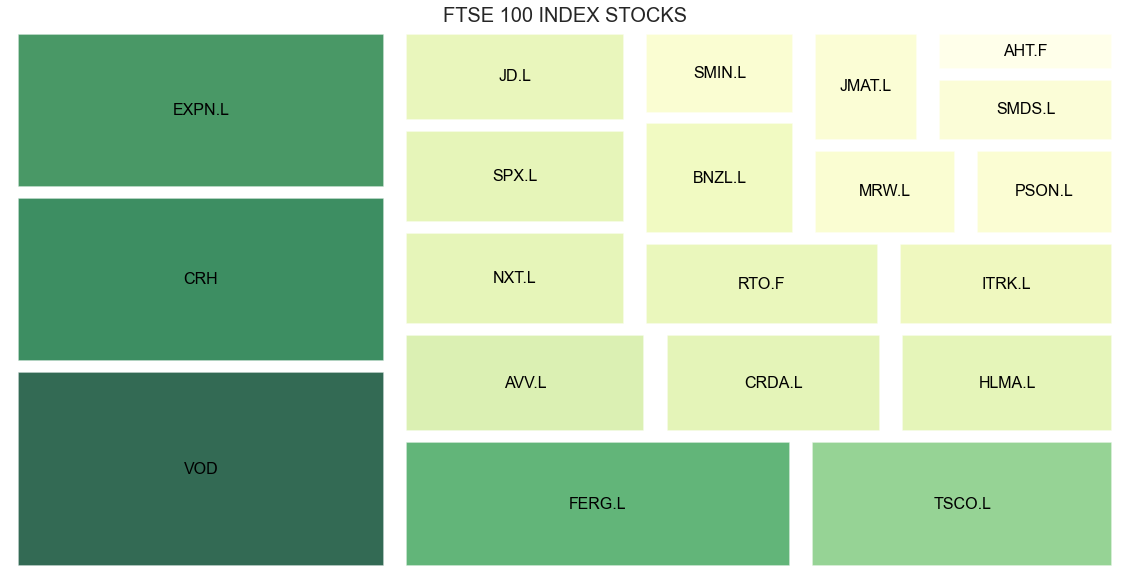

<Figure size 432x288 with 0 Axes>

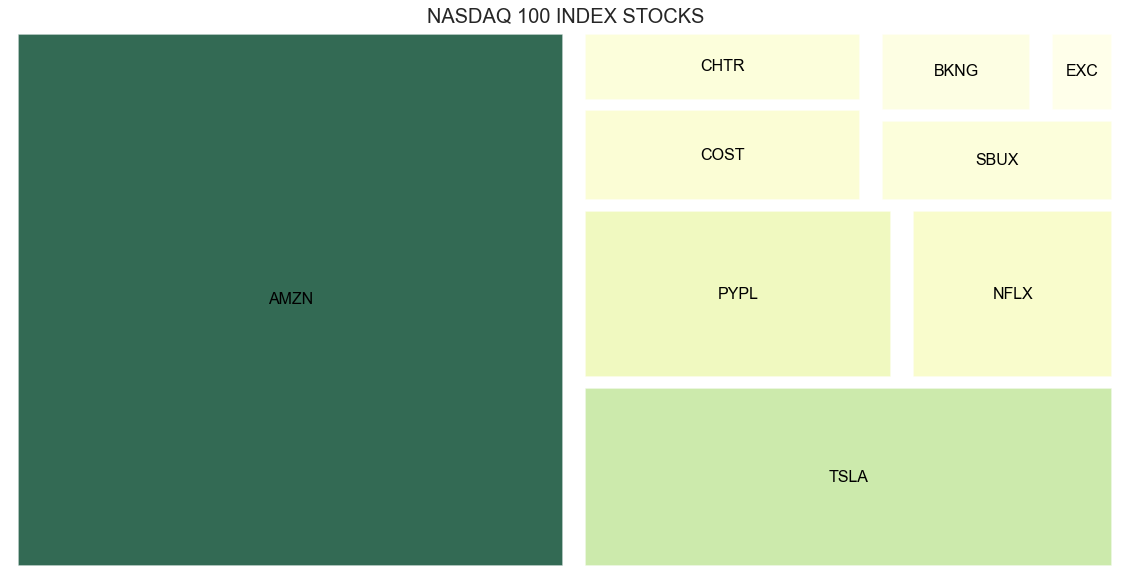

<Figure size 432x288 with 0 Axes>

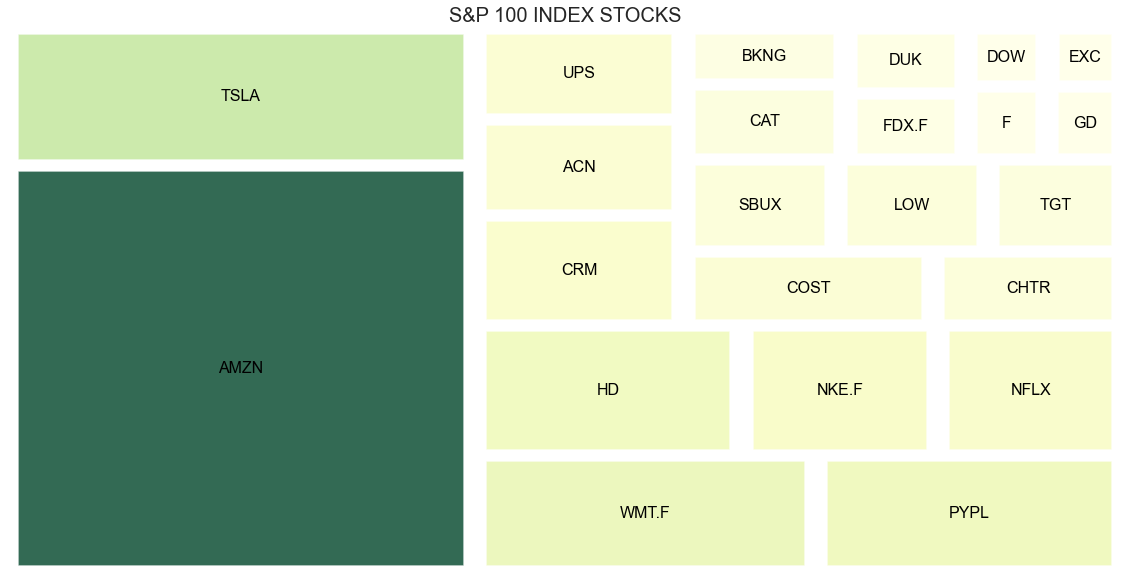

<Figure size 432x288 with 0 Axes>

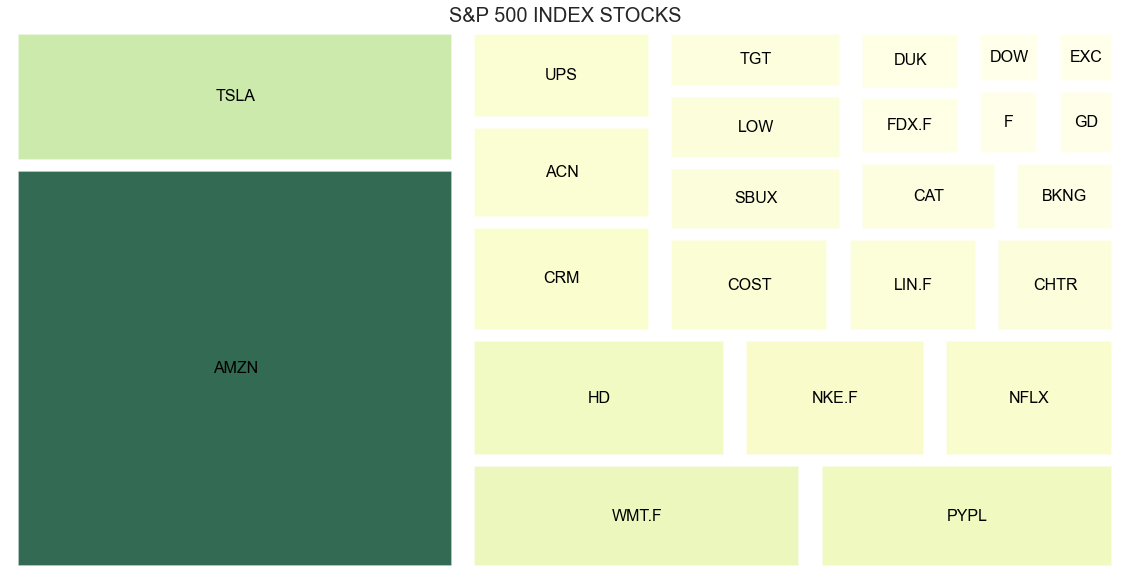

In [49]:
for indice in indices:
    plot_by_indice(indice)

## By industry

In [50]:
industries = np.unique(', '.join(source_df['Industries']).split(', '))
industries

array(['Aerospace', 'Aerospace & Defense',
       'Air Freight & Courier Services', 'Applied Resources',
       'Auto & Truck Manufacturers', 'Automobiles & Auto Parts',
       'Automotive', 'Basic Materials', 'Broadcasting',
       'Building materials', 'Business Support Services', 'Chemicals',
       'Commodity Chemicals', 'Construction Materials',
       'Consumer Cyclicals', 'Consumer Non-Cyclicals',
       'Consumer Publishing', 'Containers & Packaging',
       'Cyclical Consumer Products', 'Cyclical Consumer Services',
       'Defense', 'Department Stores', 'Discount Stores',
       'Diversified Retail', 'Diversified Trading & Distributing',
       'Electric Utilities', 'Electric Utilities & IPPs',
       'Electrical Components & Equipment', 'Energy',
       'Enterprise Asset Management', 'Enterprise Solutions',
       'Equipment & Components', 'Food & Drug Retailing',
       'Food Retail & Distribution', 'Footwear',
       'Freight & Logistics Services', 'Heavy Machinery & Vehic

In [51]:
industries_to_plot = []

for industry in industries:
    industry_df = source_df[source_df['Industries'].str.contains(industry)].copy()
    if(len(industry_df)>=4):
        industries_to_plot.append((industry,industry_df,len(industry_df)))

industries_to_plot = sorted(industries_to_plot, key=lambda x: x[2], reverse=True)

In [54]:
map_df = pd.DataFrame(columns=['Yahoo Symbol','Industry','Market Cap (USD)'])

for industry_to_plot in industries_to_plot:
    valid = True    

    for industry_to_compare in industries_to_plot:
        if (industry_to_plot[1] is industry_to_compare[1]):
            continue

        valid = not all(elem in list(industry_to_compare[1]['Yahoo Symbol']) for elem in list(industry_to_plot[1]['Yahoo Symbol']))
        
        if(not valid):
            break

    if(valid):
        industry_to_plot[1]['Industry'] = industry_to_plot[0]
        map_df = map_df.append(industry_to_plot[1][['Yahoo Symbol','Industry','Market Cap (USD)']], ignore_index=True)

map_df = map_df[~map_df['Yahoo Symbol'].duplicated(keep='last')].reset_index(drop=True)
map_df['Industry'] = map_df['Industry'].str.upper()
map_df = map_df.join(excel_df[['Stock','Symbol','Yahoo Symbol','Description']].set_index('Yahoo Symbol'), on='Yahoo Symbol')
map_df[['Stock','Symbol','Yahoo Symbol','Description','Industry','Market Cap (USD)']]

,Stock,Symbol,Yahoo Symbol,Description,Industry,Market Cap (USD)
0,adidas AG,ADS,ADS.F,"adidas AG, together with its subsidiaries, des...",CONSUMER CYCLICALS,7.294829e+10
1,Ford Motor Company,F,F,"Ford Motor Company designs, manufactures, mark...",CONSUMER CYCLICALS,5.779895e+10
2,NIKE Inc.,NKE,NKE.F,"NIKE, Inc., together with its subsidiaries, de...",CONSUMER CYCLICALS,2.522963e+11
3,Starbucks Corporation,SBUX,SBUX,"Starbucks Corporation, together with its subsi...",CONSUMER CYCLICALS,1.384149e+11
4,Bayerische Motoren Werke AG,BMW,BMW.F,"Bayerische Motoren Werke AG, together with its...",CONSUMER CYCLICALS,6.762244e+10
5,Pearson PLC,PSON,PSON.L,Pearson plc provides educational materials and...,CONSUMER CYCLICALS,8.590633e+09
6,Daimler AG,DAI,DAI.F,"Daimler AG, together its subsidiaries, develop...",CONSUMER CYCLICALS,9.258993e+10
7,Tesla Inc.,TSLA,TSLA,"Tesla, Inc. designs, develops, manufactures, l...",CONSUMER CYCLICALS,6.328597e+11
8,Booking Holdings Inc.,BKNG,BKNG,Booking Holdings Inc. provides travel and rest...,CONSUMER CYCLICALS,9.011048e+10
9,Charter Communications Inc.,CHTR,CHTR,"Charter Communications, Inc. operates as a bro...",CONSUMER CYCLICALS,1.389468e+11


In [55]:
fig = px.treemap(map_df, 
                 path=['Industry', 'Symbol'], 
                 values='Market Cap (USD)',
                 color='Market Cap (USD)',
                 title='STOCKS CATEGORIZED BY INDUSTRIES',
                 width=1280,
                 height=760
                )
fig.show()
fig.write_image("../images/INDUSTRIES.png")
